<a href="https://colab.research.google.com/github/LadanTRZ/Vehicle-company-Database/blob/main/Financial_Instrument_Simulation_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Financial Instrument Simulation and Analysis***

The code structure is modular, with each task encapsulated within its own function. Parameters are passed to functions as arguments, and the overall flow of the program is easy to follow.

1. Import Libraries:

      These lines import the necessary libraries: NumPy for numerical computations and matplotlib.pyplot for plotting.
2. Simulation Function:

      This function run_simulation simulates the prices of a financial instrument (e.g., stock or bond) over a specified number of years and simulations. It uses nested loops to iterate over each simulation and each year, updating the price based on random fluctuations modeled by a normal distribution.
3. Performance Calculation Function:

      This function calculate_performance computes various performance metrics based on the simulated prices over time. It calculates returns, average return, volatility, Sharpe ratio, and maximum drawdown.
4. Plotting Function:

      This function plot_simulation creates a visualization of the simulation results. It plots the mean price trajectories and histograms of returns for both stocks and bonds over the specified number of years.
5. Plot_simulation:

      By examining these plots, you can gain a better understanding of how the simulated financial instruments behave over time and the distribution of returns associated with them. This information can be valuable for assessing the performance and risk characteristics of stocks and bonds in the simulated scenario.

Stock Performance:
{'Returns': array([ 5.93685973e-01,  7.37162540e-01,  6.26755337e-01,  4.94276576e-01,
        4.12839507e-02,  1.31352061e-01,  2.35998336e-01,  8.64223099e-01,
        9.58830629e-01, -2.76116131e-01,  1.54849467e+00,  2.23847189e-01,
        3.91712535e+00,  3.11816903e+00, -1.21960210e-01,  1.47905324e+00,
        5.97868302e-01,  4.23538569e-01, -1.20233069e-02,  1.09511942e+00,
       -4.23286599e-01,  2.48314143e-01,  4.16558446e-01,  1.43595370e+00,
       -6.25871899e-02,  1.11033434e-01,  3.55928052e+00,  2.14420276e-01,
        6.46306281e-01,  1.06506756e-01, -4.85969171e-01,  9.99933656e-01,
        3.20352724e-01,  1.17791906e+00,  6.88022312e-01,  1.37161720e+00,
        2.21580418e-01,  1.48428424e+00,  1.25998048e+00,  2.76292431e+00,
        1.77529761e+00,  3.55221122e-01, -1.97533962e-01,  5.55907094e-01,
        4.62008135e+00,  4.97098496e-01,  5.37939059e-01,  2.20950830e+00,
        3.60191249e+00,  4.27156802e-01,  5.02593796e-01, -3.01642380

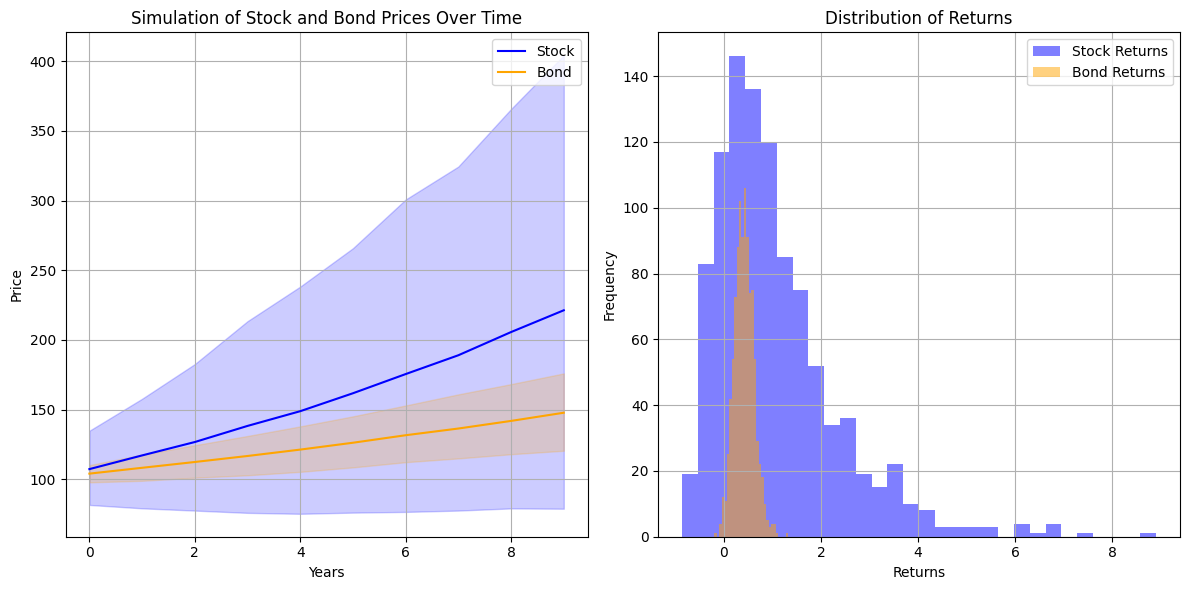

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(initial_price, volatility, expected_return, years, num_simulations):
    prices_over_time = np.zeros((years, num_simulations))
    for i in range(num_simulations):
        price = initial_price
        for year in range(years):
            price *= np.random.normal(1 + expected_return, volatility)
            prices_over_time[year, i] = price
    return prices_over_time

def calculate_performance(prices_over_time):
    returns = (prices_over_time[-1] / prices_over_time[0]) - 1
    avg_return = np.mean(returns)
    volatility = np.std(returns)
    sharpe_ratio = avg_return / volatility
    max_drawdown = np.max(np.maximum.accumulate(prices_over_time, axis=0) - prices_over_time, axis=0)
    return {
        'Returns': returns,
        'Average Return': avg_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    }

def plot_simulation(prices_over_time_stock, prices_over_time_bond, years):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(years), prices_over_time_stock.mean(axis=1), label='Stock', color='blue')
    plt.plot(np.arange(years), prices_over_time_bond.mean(axis=1), label='Bond', color='orange')
    plt.fill_between(np.arange(years), np.percentile(prices_over_time_stock, 10, axis=1), np.percentile(prices_over_time_stock, 90, axis=1), color='blue', alpha=0.2)
    plt.fill_between(np.arange(years), np.percentile(prices_over_time_bond, 10, axis=1), np.percentile(prices_over_time_bond, 90, axis=1), color='orange', alpha=0.2)
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.title('Simulation of Stock and Bond Prices Over Time')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.hist(performance_stock['Returns'], bins=30, alpha=0.5, label='Stock Returns', color='blue')
    plt.hist(performance_bond['Returns'], bins=30, alpha=0.5, label='Bond Returns', color='orange')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.title('Distribution of Returns')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
initial_price_stock = 100
volatility_stock = 0.2
expected_return_stock = 0.08

initial_price_bond = 100
volatility_bond = 0.05
expected_return_bond = 0.04

years = 10
num_simulations = 1000

# Run simulation
prices_over_time_stock = run_simulation(initial_price_stock, volatility_stock, expected_return_stock, years, num_simulations)
prices_over_time_bond = run_simulation(initial_price_bond, volatility_bond, expected_return_bond, years, num_simulations)

# Calculate performance metrics
performance_stock = calculate_performance(prices_over_time_stock)
performance_bond = calculate_performance(prices_over_time_bond)

# Print performance metrics
print("Stock Performance:")
print(performance_stock)
print("\nBond Performance:")
print(performance_bond)

# Plot results
plot_simulation(prices_over_time_stock, prices_over_time_bond, years)